<a href="https://colab.research.google.com/github/Kitagawa-Mariin/HenryPark_Python/blob/Machine_Learning/6_3_PrincipalComponentAnalysis_Fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Dimension*** \

과일 사진, 10,000개의 픽셀. 10,000개의 특성. >> 10,000개의 차원. \

***Dimensionality Reduction*** \

차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법이다. \

***Principal Component Analysis*** \

대표적 차원 축소 알고리즘. 데이터에 있는 분산이 큰 방향을 찾는 것. (분산 : 데이터가 널리 퍼져있는 정도)

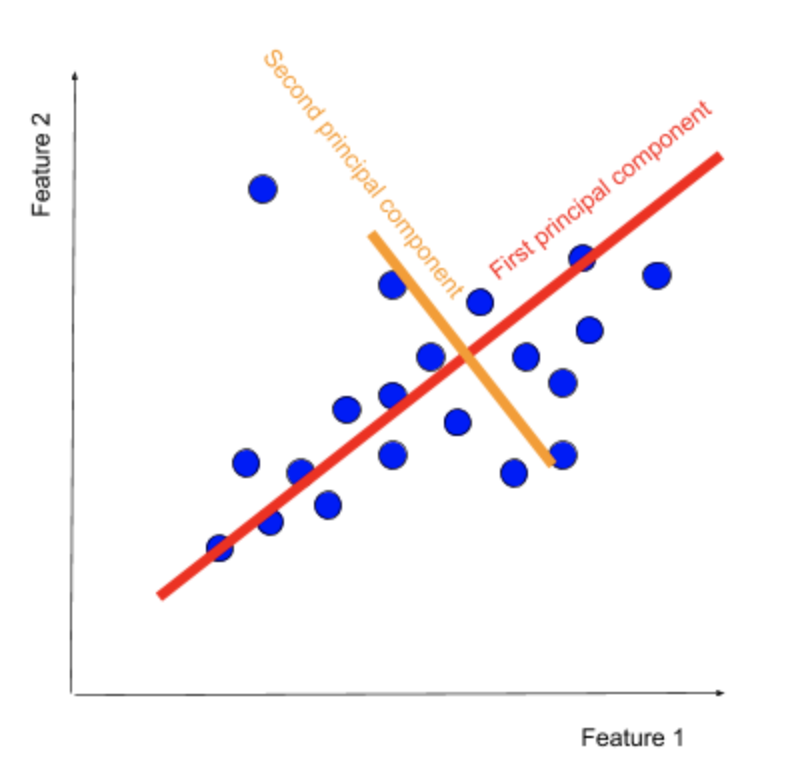 \

***Principal Component*** \

가장 데이터의 분포를 가장 잘 표현하는 방향. \
원본 데이터는 주성분을 사용해 차원을 줄일 수 있다. 예를 들면 s(4,2)를 주성분에 직각으로 투영하면 1차원 데이터 p(4.5)를 만들 수 있다. \

주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다는 점. 주성분이 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타내고 있다.

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

from sklearn.decomposition import PCA
pca = PCA(n_components=50) #50개의 주성분을 찾는다.
pca.fit(fruits_2d)
print(pca.components_.shape) #(50, 10000) pca.components의 첫 번째 차원은 50. 50개의 주성분. 두 번째 차원은 항상 원본 데이터의 특성 개수
#10,000


--2024-06-30 04:03:32--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-06-30 04:03:32--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-06-30 04:03:33--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

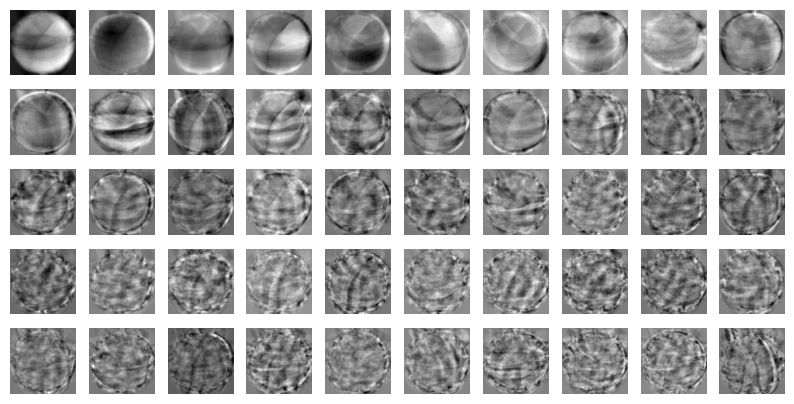

In [ ]:
#원본 데이터와 차원이 같으므로 주성분을 100 * 100 크기의 이미지처럼 출력가능.
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n = len(arr) #n is the number of samples
  #한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산한다.
  rows = int(np.ceil(n/10))
  #행이 1개이면 열의 개수는 샘플 개수. 그렇지 않으면 10개.
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10 +j < n:   #n 개까지만 그린다.
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
        axs[i, j].axis('off')
  plt.show()

draw_fruits(pca.components_.reshape(-1, 100, 100)) #분산이 큰 방향을 순서대로.

In [ ]:
#주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄이기 가능.
#원본 데이터를 각 주성분으로 분해하는 것.
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


***Inverse_transform() 원본 데이터 재구성*** \

10,000개의 특성을 50개로 줄였다. 이로 인해 어느 정도 손실이 발생할 수밖에. \
inverse_transform()로 10,000 특성 다시 복원. \

만약 주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성 가능.

(300, 10000)


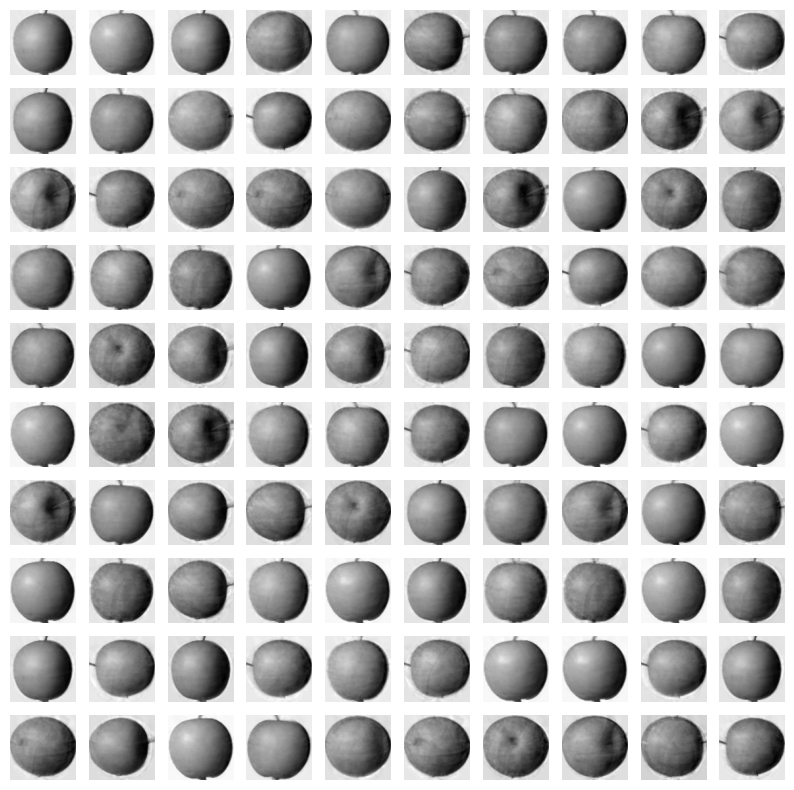

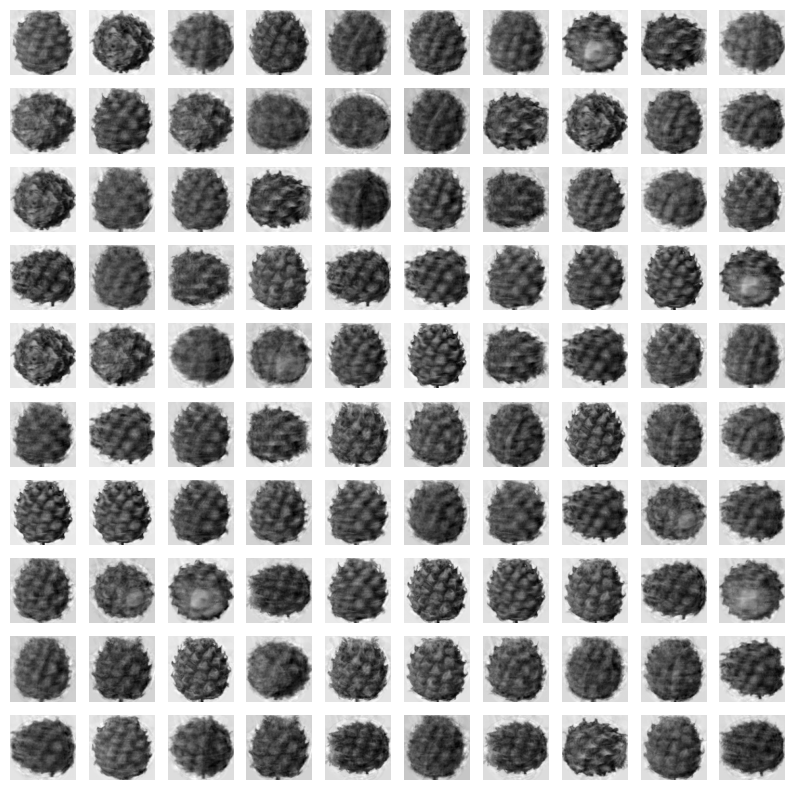

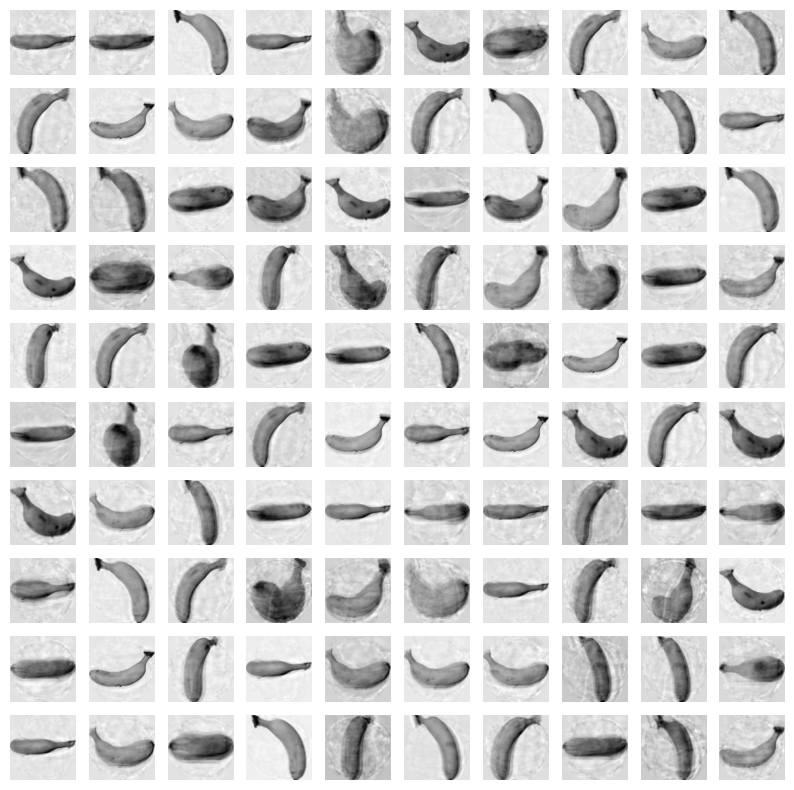

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

***Explained Variance*** \

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값. \
explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록됨. 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.


In [ ]:
print(np.sum(pca.explained_variance_ratio_))
#92%가 넘는 분산을 유지.

0.9214735897753242


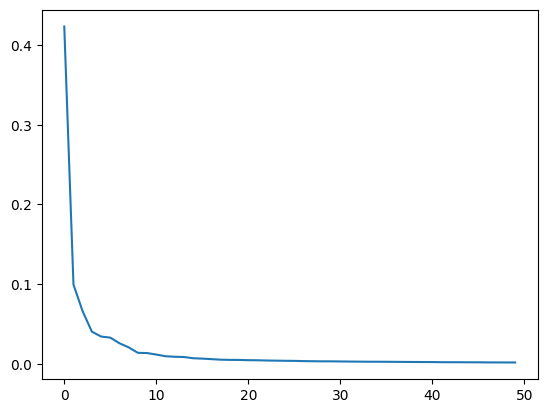

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show() #처음 10개의 주성분이 대부분의 분산을 표현.

***다른 알고리즘과 함께 사용하기*** \

원본 데이터를 사용 \
PCA로 차원 축소된 데이터를 사용하여 지도학습 모델을 훈련. \
둘이 비교해서 얼마나 차이가 없는지 확인하기.




In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

지도 학습 모델을 사용하려면 타깃값이 있어야 함. 사과를 0 파인애플을 1 바나나를 2.

In [ ]:
target = np.array([0]*100 + [1]*100 + [2]*100)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score'])) #특성이 10,000개나 되기 때문에 300개의 샘플에서 과대적합! 0.9978
print(np.mean(scores['fit_time'])) #각 교차 검증 폴드의 훈련 시간이 기록.

0.9966666666666667
0.9842994213104248


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) #시간 훨씬 줄어들었는데, score 1 와!

1.0
0.021764183044433595


In [ ]:
pca = PCA(n_components=0.5) #주성분 개수 대신 0~1 사이의 비율을 실수로 입력.
pca.fit(fruits_2d)
print(pca.n_components_)#찾은 주성분의 개수

2


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.018894767761230467


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True)) #차원 축소된 데이터를 사용해 k-평균 알고리즘

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


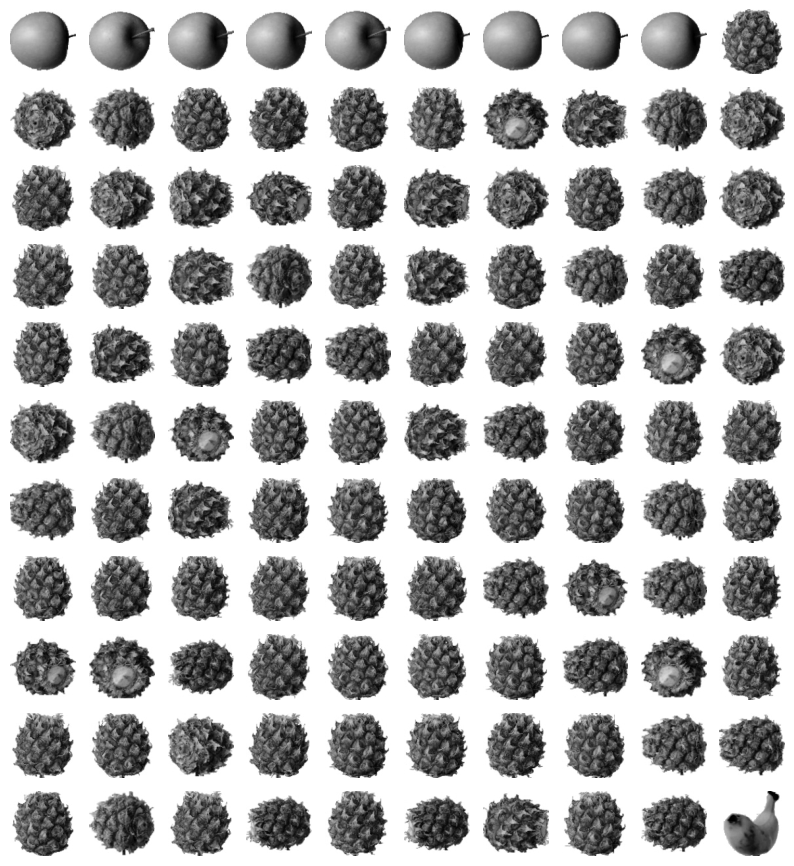

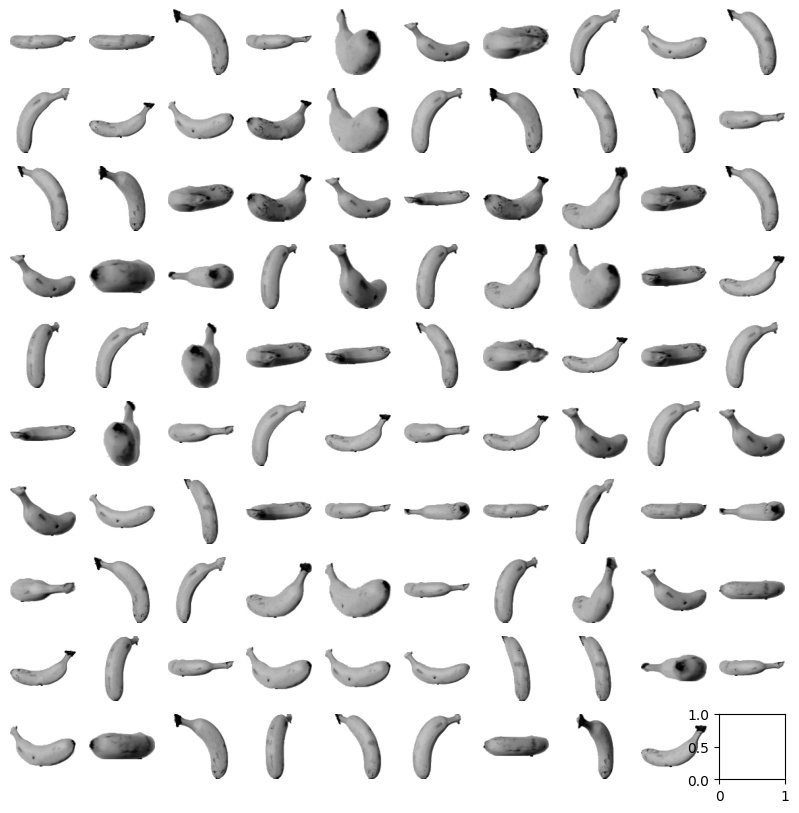

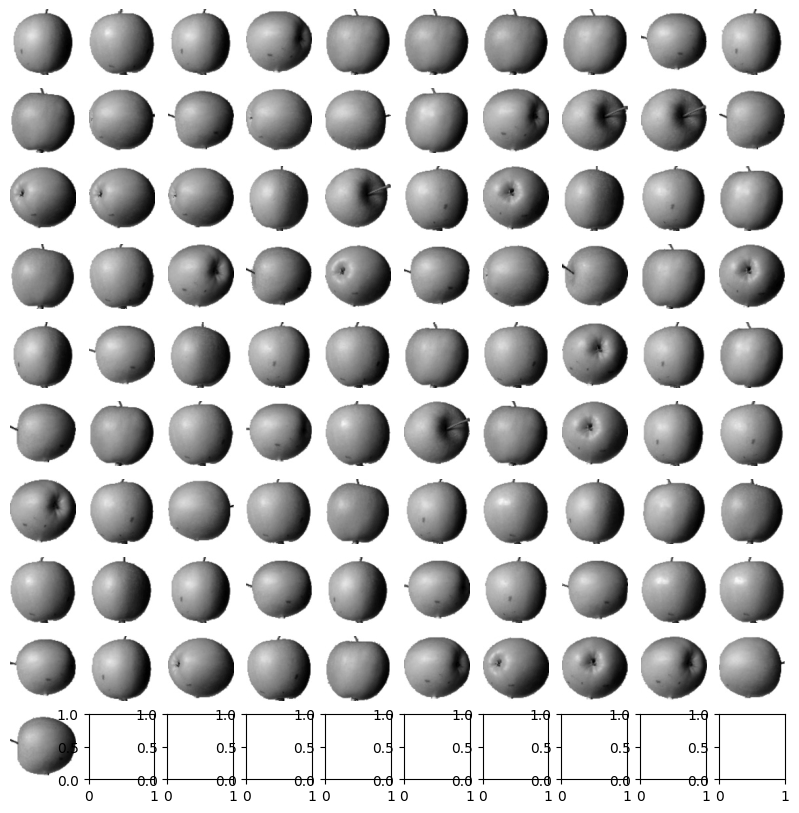

In [ ]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

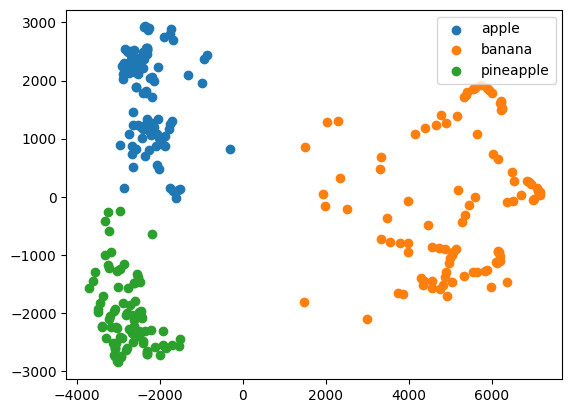

In [ ]:
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()